### Below are 3 models and their results (Dense, CNN, DenseNet121)

#### Set up notebook

In [1]:
#import libaries
%env PYTHONHASHSEED=0
#import libaries
import numpy as np
from numpy.random import seed
import random as python_random
import tensorflow as tf

# The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
np.random.seed(10)

# The below is necessary for starting core Python generated random numbers in a well-defined state.
python_random.seed(120)

# The below set_seed() will make random number generation in the TensorFlow backend have a well-defined initial state.
tf.random.set_seed(123)

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import layers
from keras import backend as K
from keras import models

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, roc_auc_score
import itertools
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score

env: PYTHONHASHSEED=0


Using TensorFlow backend.


In [5]:
#set up function for confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Set up test data for evaulation

In [6]:
#create directory to train, test, val data
test_folder = '../data_val/test'

#rescale and resize train, val, test data
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(224,224), batch_size = 390) 

#split data to images and labels
test_images, test_labels = next(test_generator)

#reshape data
test_img = test_images.reshape(test_images.shape[0], -1)
test_y = np.reshape(test_labels[:,0], (390,1))

Found 390 images belonging to 2 classes.


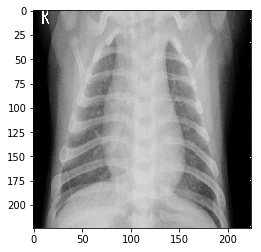

In [9]:
plt.imshow(test_images[1])

### Dense Baseline Model

In [10]:
#import dense baseline model 
#refer to Step02_Training/Step02a and Step02_Training/Step02b for this model
dense_model = keras.models.load_model('../models/Step02a_model.h5')

In [11]:
dense_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                3010580   
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 3,010,773
Trainable params: 3,010,773
Non-trainable params: 0
_________________________________________________________________


In [14]:
dense_model.evaluate(test_img, test_y)

390/390 [==============================] - 1s 2ms/sample - loss: 0.4613 - acc: 0.8667 - precision_1: 0.8711 - recall_1: 0.9215 - true_positives_1: 223.0000 - true_negatives_1: 115.0000


[0.46130663553873696, 0.8666667, 0.87109375, 0.9214876, 223.0, 115.0]

Confusion Matrix, without normalization
[[115  33]
 [ 19 223]]


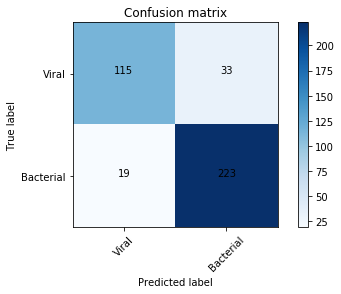

In [17]:
#confusion matrix
y_pred = dense_model.predict_classes(test_img)

cm = confusion_matrix(test_y, y_pred)
classes = ['Viral', 'Bacterial']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')


### CNN Model

In [19]:
#import dense baseline model 
#refer to Step02_Training/Step02d for this model
cnn_model = keras.models.load_model('../models/Step02d_model.h5')

In [20]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [22]:
#evaluate model with test data
cnn_model.evaluate(test_images, test_y)

390/390 [==============================] - 3s 8ms/sample - loss: 0.8008 - acc: 0.7564


[0.8008302337084061, 0.75641024]

Confusion Matrix, without normalization
[[ 65  83]
 [ 12 230]]


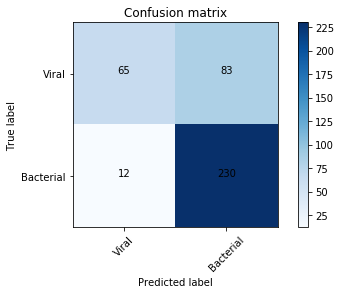

In [24]:
#confusion matrix
y_pred = cnn_model.predict_classes(test_images)

cm = confusion_matrix(test_y, y_pred)
classes = ['Viral', 'Bacterial']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

### DenseNet121 Model

In [26]:
#import dense baseline model 
#refer to Step02_Training/Step02e for this model
densenet121_model = keras.models.load_model('../models/Step02e_model.h5')

In [27]:
densenet121_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [62]:
#evaluate model with test data
#convert y_test to categorical 
from keras.utils import np_utils
y_test = np_utils.to_categorical(test_y, 2)
densenet121_model.evaluate(test_images, y_test)

390/390 [==============================] - 22s 57ms/sample - loss: 1.0657 - acc: 0.3872 - precision: 0.3872 - recall: 0.3872 - true_positives: 151.0000 - true_negatives: 151.0000


[1.065726400950016, 0.3871795, 0.3871795, 0.3871795, 151.0, 151.0]

Confusion Matrix, without normalization
[[148   0]
 [239   3]]


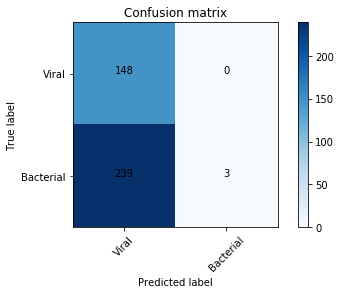

In [63]:
#confusion matrix
y_pred = densenet121_model.predict(test_images)
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
classes = ['Viral', 'Bacterial']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')